In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../_styling/')
from style import prep_plot, GRAY1, GRAY2, GRAY3, BLACK

![https://ourworldindata.org/uploads/2021/03/Share-of-internet-users.png](https://ourworldindata.org/uploads/2021/03/Share-of-internet-users.png)

In [2]:
df = pd.read_csv("share-of-individuals-using-the-internet.csv")

regions = list(set([c for c in df['Entity'] if 'WB' in c]))
countries = [
    c for c in df['Entity'] 
    if (
        'countries' not in c 
        and c not in regions
        and c not in ["World", "European Union (27)"]
    )
]

df['Entity'] = df['Entity'].apply(lambda x: x.replace(" (WB)",""))
regions = [x.replace(" (WB)","") for x in regions]

max_year = 2020
df = df[df['Year'] <= max_year]
val_col = 'Individuals using the Internet (% of population)'
df = df[['Entity', 'Year', val_col]].dropna()

df.head()

,Entity,Year,Individuals using the Internet (% of population)
0,Afghanistan,1990,0.0
1,Afghanistan,1991,0.0
2,Afghanistan,1992,0.0
3,Afghanistan,1993,0.0
4,Afghanistan,1994,0.0


<Figure size 3740x3740 with 0 Axes>

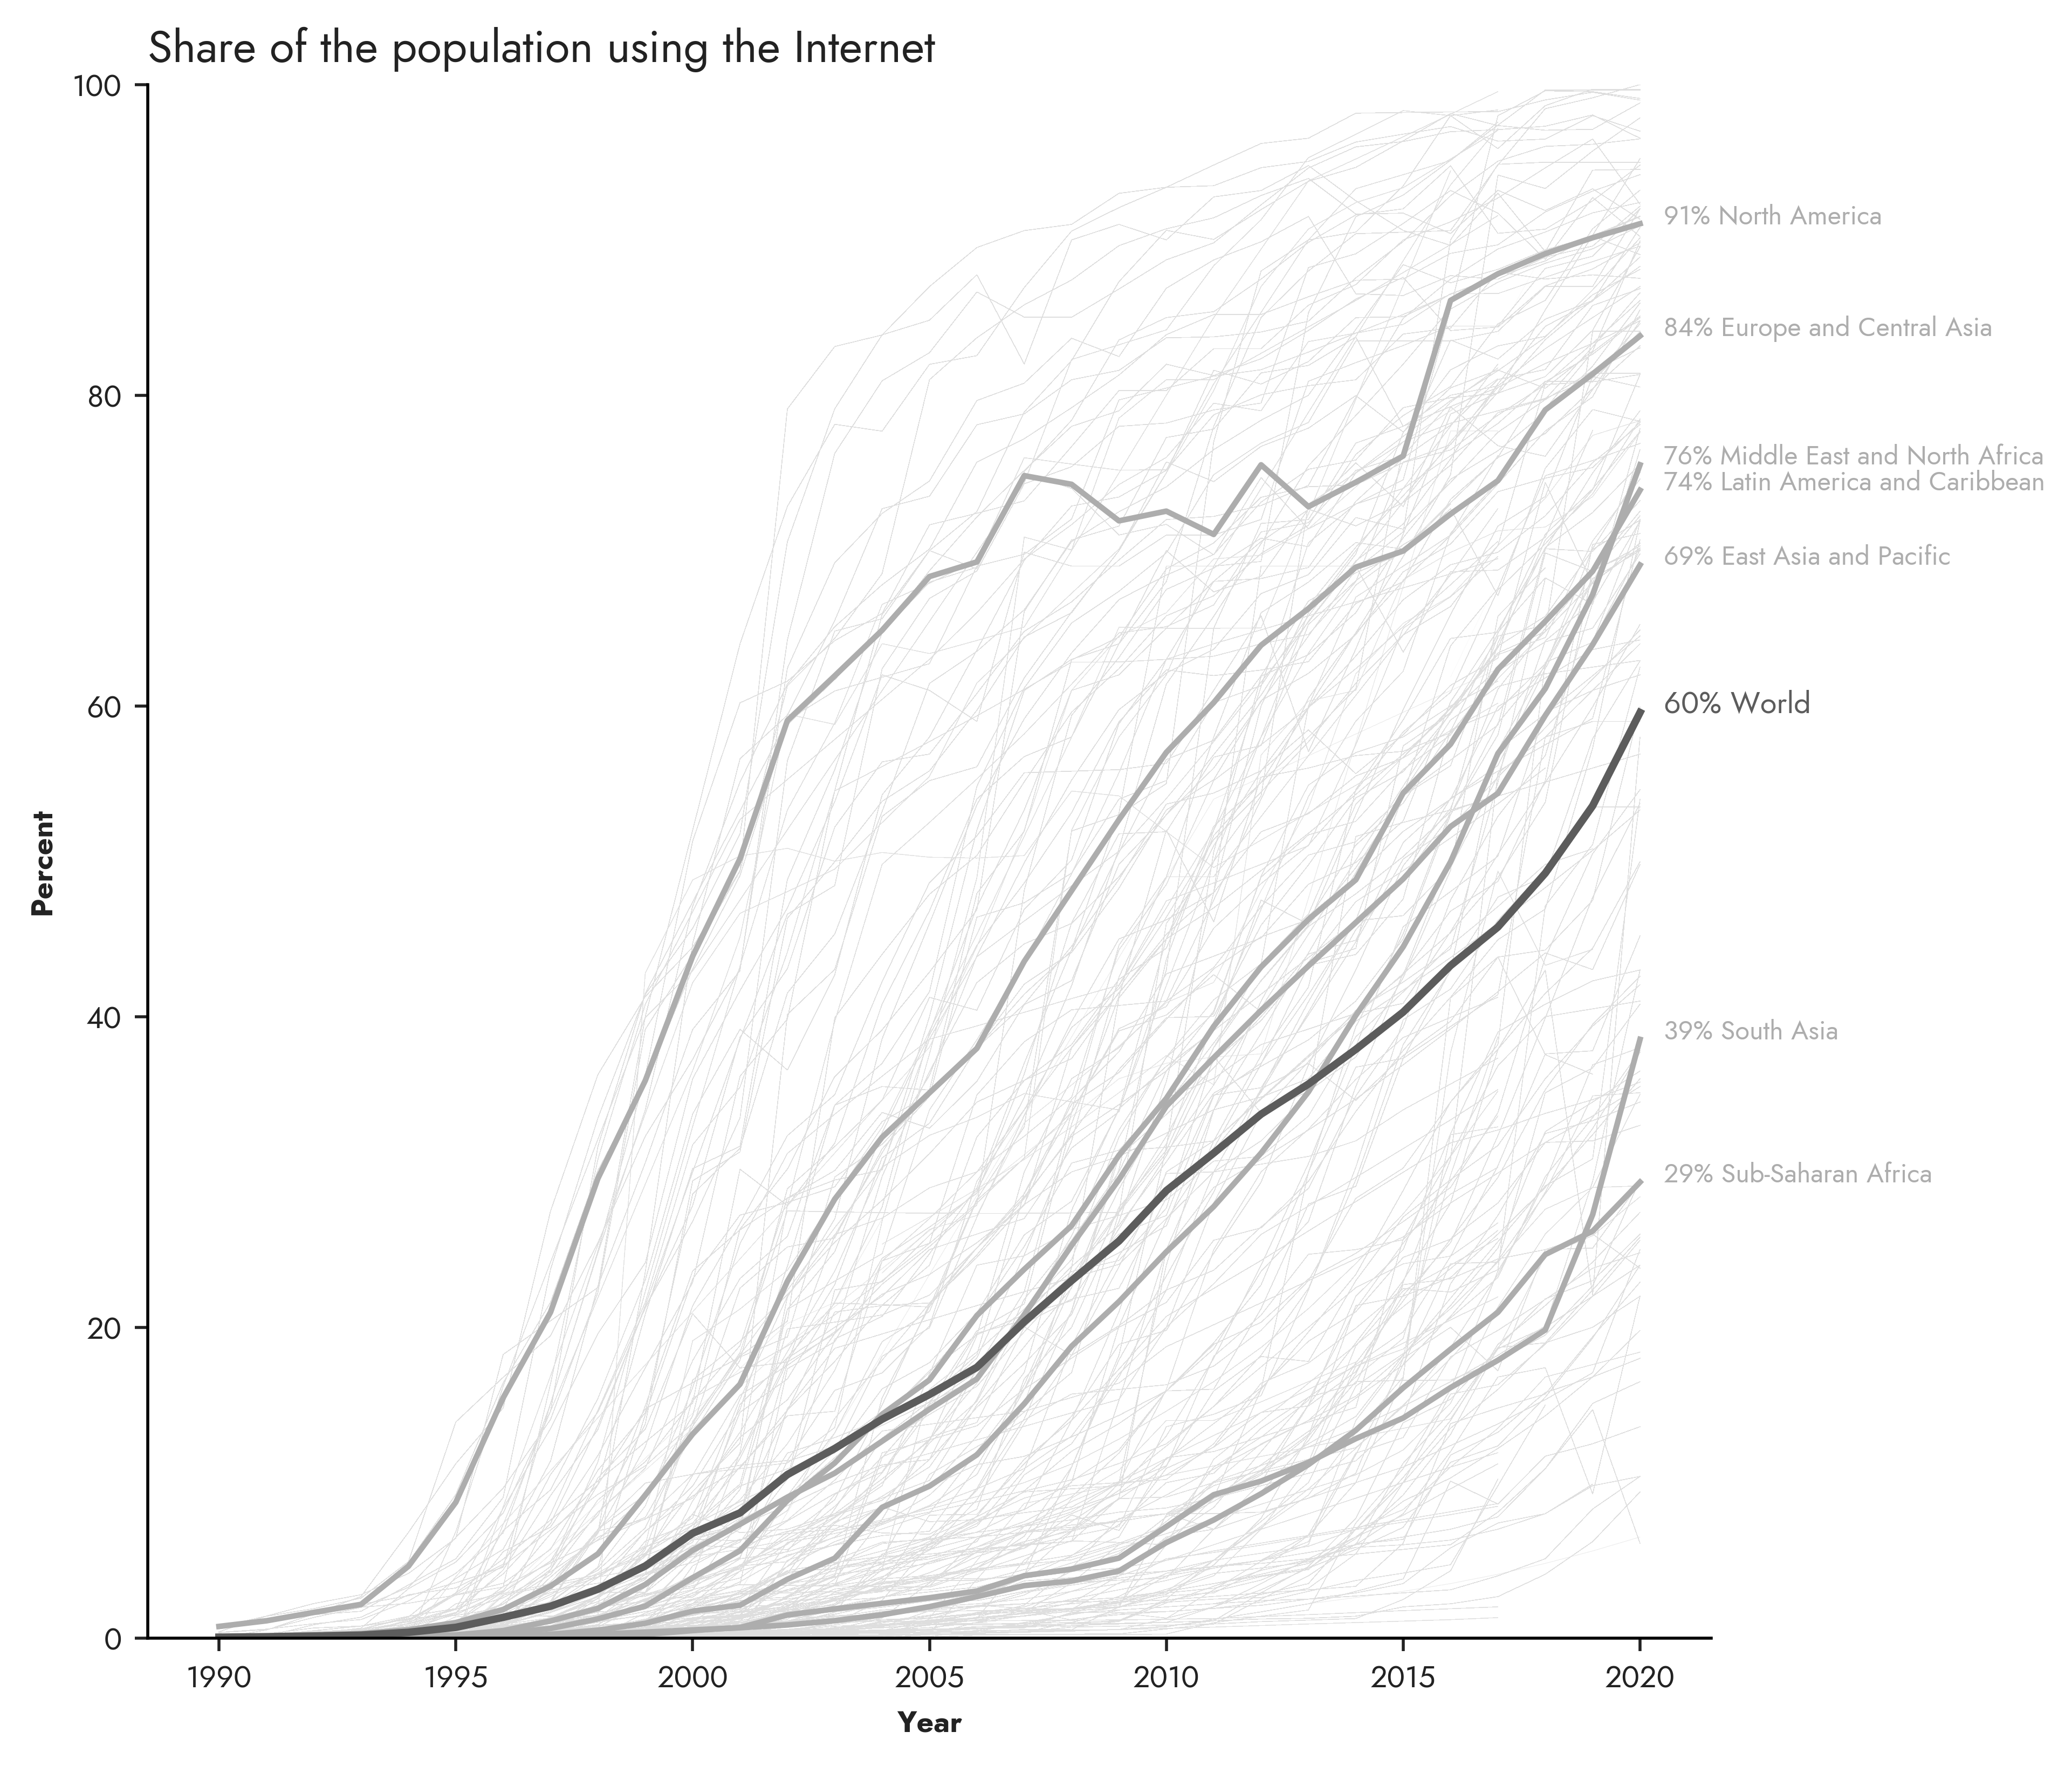

In [3]:
plt = prep_plot(fig_height=7.48)
fig, ax = plt.subplots()

FONTSIZE = 8

for country in countries:
    dff = df[df['Entity']==country]
    xs = dff['Year'].to_list()
    ys = dff[val_col].to_list()
    ax.plot(xs, ys, color=GRAY3, lw=.1, alpha=.1)
    
for region in regions:
    dff = df[df['Entity']==region]
    xs = dff['Year'].to_list()
    ys = dff[val_col].to_list()
    ax.plot(xs, ys, label=region, color=GRAY2, lw=1.5)
    label = f"{round(ys[-1])}% {region}"
    ax.annotate(label, xy=(max_year + .5, ys[-1]), size=FONTSIZE-1, color=GRAY2)    
    
dff = df[df['Entity']=='World']
xs = dff['Year'].to_list()
ys = dff[val_col].to_list()
ax.plot(xs, ys, color=GRAY1, lw=2)
label = f"{round(ys[-1])}% World"
ax.annotate(label, xy=(max_year + .5, ys[-1]), size=FONTSIZE, color=GRAY1)    
    
ax.set_xlabel('Year', fontsize=FONTSIZE, weight='bold')
ax.set_ylabel('Percent', fontsize=FONTSIZE, weight='bold')
ax.tick_params('both', labelsize=FONTSIZE)
ax.set_ylim(0,100)

ax.set_title('Share of the population using the Internet', loc='left')

plt.savefig("share_online.png", bbox_inches="tight")